# Atividade 01 - **Introdução a Visão Computacional - 18/11/24**

Para esta atividade, foi escolhida uma imagem de paisagem, disponível no site Pexels.

*   "Acessada em: https://www.pexels.com/pt-br/foto/mirror-lake-refletindo-a-casa-de-madeira-no-meio-do-lago-com-vista-para-montanhas-147411/"

## **1.   Leia a imagem colorida e em tons de cinza.** ✅

In [196]:
# Bibliotecas utilizadas
import cv2 #OpenCV é uma biblioteca de visão computacional utilizada para processar vídeos e imagens
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import Image

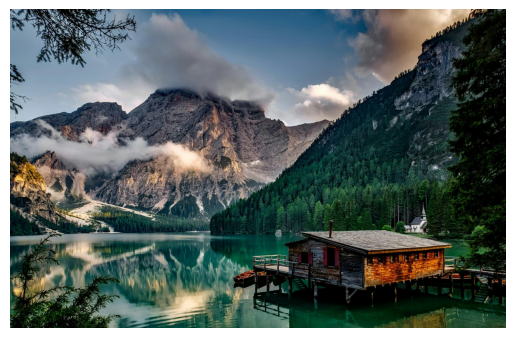

In [197]:
# Lê a imagem em BGR (padrão OpenCV)
img_BGR = cv2.imread("/content/drive/MyDrive/Sistemas de Informação/2 - Periodo/Visão Computacional/Atividade01/paisagem.jpg", cv2.IMREAD_COLOR);

# Converte de BGR para RGB
img_convertida_RGB = img_BGR[:,:,::-1];

# Exibe a imagem usando matplotlib (que usa RGB)
plt.imshow(img_convertida_RGB);

# Remove os eixos
plt.axis('off')
plt.show()


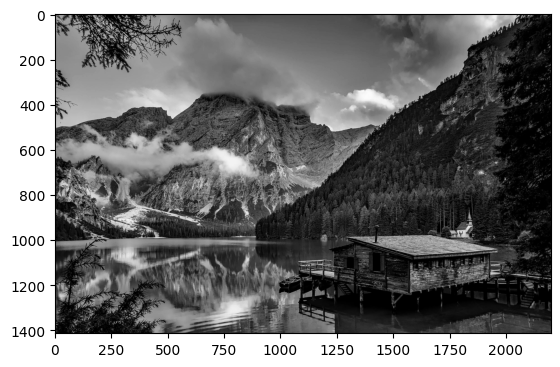

In [198]:
# Transforma a imagem em tons de cinzas
img_gray = cv2.imread("/content/drive/MyDrive/Sistemas de Informação/2 - Periodo/Visão Computacional/Atividade01/paisagem.jpg", cv2.IMREAD_GRAYSCALE);
plt.imshow(img_gray, cmap='gray');

## **2.   Calcular o size e o shape das imagens coloridas e em tons de cinza. por que esses valores são diferentes?** ✅

In [199]:
# IMAGEM COLORIDA

# Size da imagem
print(img_convertida_RGB.size)

# Shape da imagem
print(img_convertida_RGB.shape)

9332400
(1414, 2200, 3)


In [200]:
# IMAGEM EM TONS DE CINZA

# Size da imagem
print(img_gray.size)

#Shape da imagem
print(img_gray.shape)

3110800
(1414, 2200)


## **3.   Qual os valores máximo e mínimo da imagem em tons de cinza?** ✅

In [201]:
print(img_gray.max())

255


In [202]:
print(img_gray.min())

0


A partir da questão 4, utilizar apenas a imagem em tons de cinza.
## **4.   Recorte alguma parte da imagem e coloque uma tarja preta.** ✅


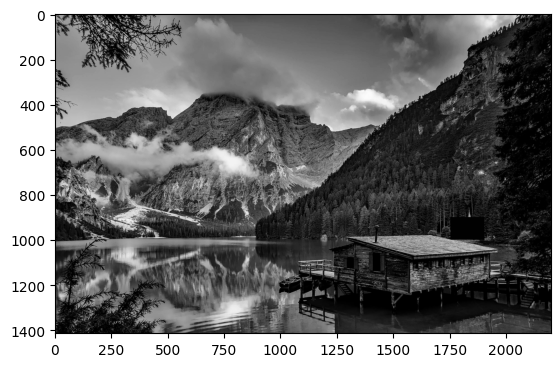

In [203]:
img_gray[900:1000, 1750:1900] = 1
plt.imshow(img_gray, cmap='gray')

## **5.   Faça uma rotação na imagem.** ✅

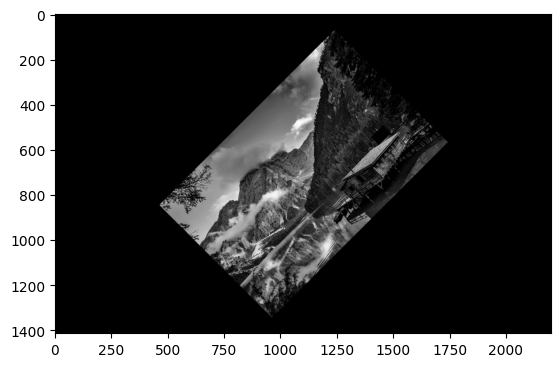

In [204]:
# Rotação com variação de tamanho
largura = img_gray.shape[1]
altura = img_gray.shape[0]

# Definir o ponto central da imagem (pivô para a rotação)
ponto = (largura/2, altura/2)

rotacao = cv2.getRotationMatrix2D(ponto, 45,0.5) # ponto central para a rotação ; ângulo de rotação em graus ; reduzir a imagem pela metade
rotacionado = cv2.warpAffine(img_gray, rotacao, (largura, altura))
plt.imshow(rotacionado, cmap = 'gray')

## **6.   Calcule o histograma** ✅

In [205]:
# Transforma a imagem em tons de cinzas
img_gray = cv2.imread("/content/drive/MyDrive/Sistemas de Informação/2 - Periodo/Visão Computacional/Atividade01/paisagem.jpg", cv2.IMREAD_GRAYSCALE);

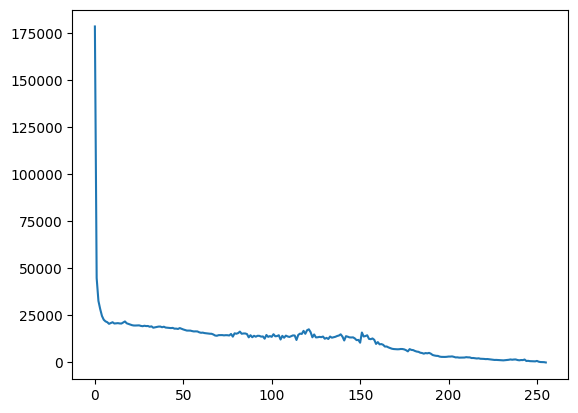

In [206]:
# Histograma
histograma = cv2.calcHist([img_gray],[0], None, [256], [0,255])
plt.plot(histograma)

## **7.   Escolha um filtro passa-baixas e aplique na imagem.** ✅

In [207]:
# Transforma a imagem em tons de cinzas
img_gray = cv2.imread("/content/drive/MyDrive/Sistemas de Informação/2 - Periodo/Visão Computacional/Atividade01/paisagem.jpg", cv2.IMREAD_GRAYSCALE);

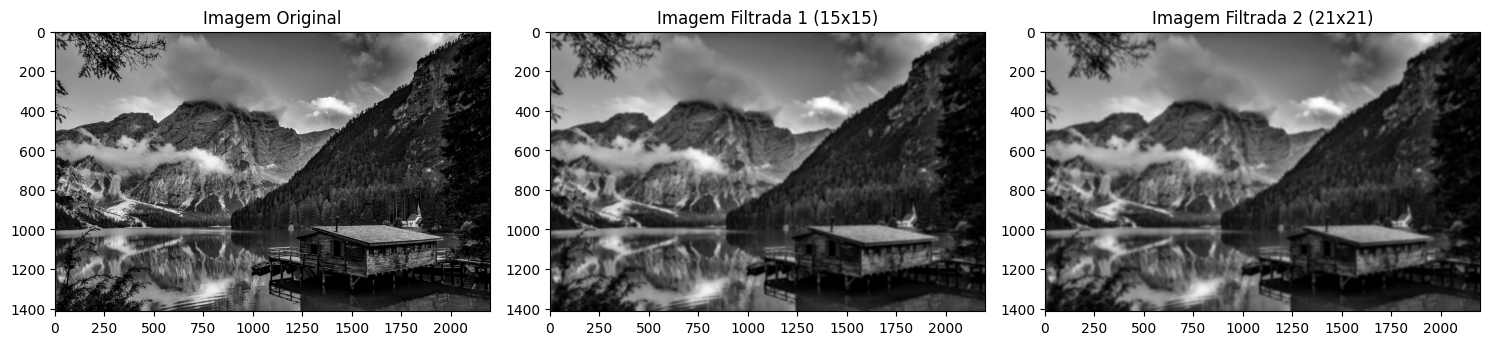

In [208]:
# Aplicar filtros com diferentes parâmetros
imgGauss1 = cv2.GaussianBlur(img_gray, (15, 15), 5)  # Suavização com os Kernel maior para aumentar a suavização
imgGauss2 = cv2.GaussianBlur(img_gray, (21, 21), 5)

# Visualizar as imagens
fig = plt.figure(figsize=(15, 10))

ax1 = fig.add_subplot(131)
ax1.imshow(img_gray, cmap='gray')
ax1.set_title('Imagem Original')

ax2 = fig.add_subplot(132)
ax2.imshow(imgGauss1, cmap='gray')
ax2.set_title('Imagem Filtrada 1 (15x15)')

ax3 = fig.add_subplot(133)
ax3.imshow(imgGauss2, cmap='gray')
ax3.set_title('Imagem Filtrada 2 (21x21)')

# Ajusta automaticamente o espaçamento entre os subplots em uma figura para evitar sobreposição entre os elementos, como títulos, rótulos de eixos e imagens.
plt.tight_layout()
plt.show()


## **8.   Escolha um limiar e aplique a binarização.** ✅

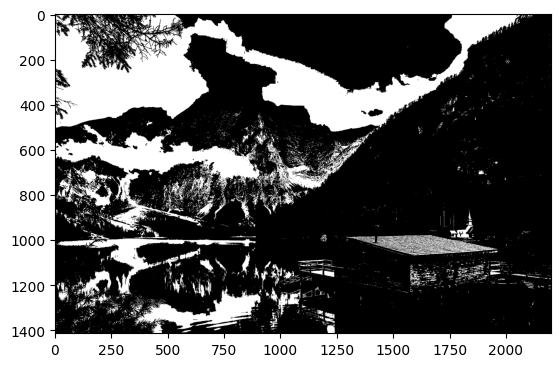

In [209]:
limiar,imglimiar1 = cv2.threshold(img_gray,128,255,cv2.THRESH_BINARY) # limiar = 128
plt.imshow(imglimiar1,cmap='gray')

## **9.   Faça a binarização com a técnica de Otsu. Qual foi o limiar sugerido?** ✅

In [210]:
# Transforma a imagem em tons de cinzas
img_gray = cv2.imread("/content/drive/MyDrive/Sistemas de Informação/2 - Periodo/Visão Computacional/Atividade01/paisagem.jpg", cv2.IMREAD_GRAYSCALE);

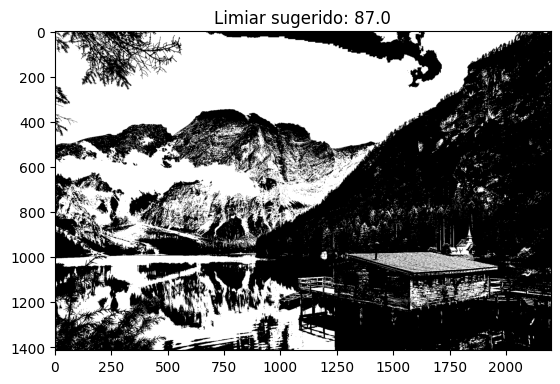

O limiar sugerido pelo método Otsu é: 87.0


In [211]:
limiar, imgotsu = cv2.threshold(img_gray, 0, 255, cv2.THRESH_OTSU)

# Mostrar a imagem binarizada
plt.imshow(imgotsu, cmap='gray')
plt.title(f'Limiar sugerido: {limiar}')
plt.show()

# Imprimir o valor do limiar sugerido
print(f'O limiar sugerido pelo método Otsu é: {limiar}')

## **10.   Escolha uma técnica e faça uma filtragem passa-altas para destacar os contornos da imagem.** ✅

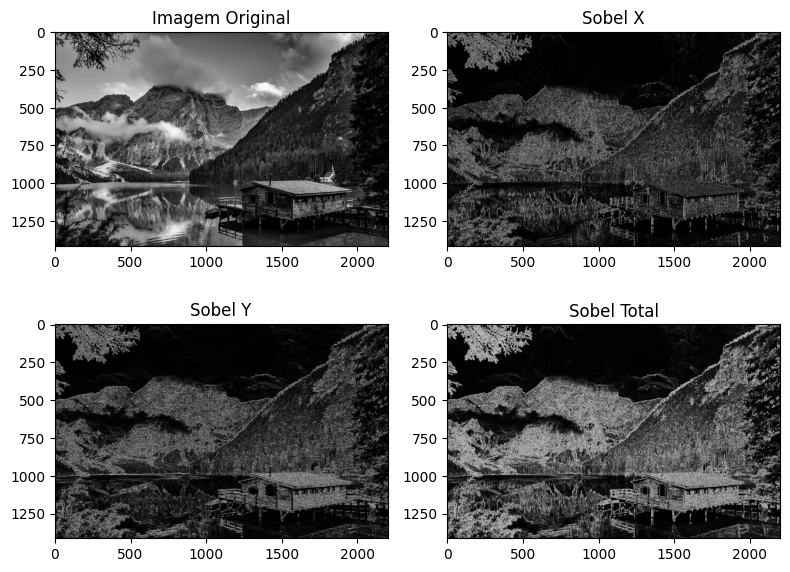

In [212]:
# Transforma a imagem em tons de cinzas
img_gray = cv2.imread("/content/drive/MyDrive/Sistemas de Informação/2 - Periodo/Visão Computacional/Atividade01/paisagem.jpg", cv2.IMREAD_GRAYSCALE);

# Aplicar o filtro Sobel na direção X e Y
sobelX = cv2.Sobel(img_gray, cv2.CV_64F, 1, 0)  # Sobel na direção X
sobelY = cv2.Sobel(img_gray, cv2.CV_64F, 0, 1)  # Sobel na direção Y

# Converter os resultados para valores absolutos e em inteiros (8 bits)
sobelX = np.uint8(np.absolute(sobelX))
sobelY = np.uint8(np.absolute(sobelY))

# Combinar as bordas horizontais e verticais
sobel = cv2.bitwise_or(sobelX, sobelY)

# Mostrar as imagens em subplots
fig = plt.figure(figsize=(8, 6))

ax1 = fig.add_subplot(221)
plt.imshow(img_gray, cmap='gray')
ax1.set_title('Imagem Original')

ax2 = fig.add_subplot(222)
plt.imshow(sobelX, cmap='gray')
ax2.set_title('Sobel X')

ax3 = fig.add_subplot(223)
plt.imshow(sobelY, cmap='gray')
ax3.set_title('Sobel Y')

ax4 = fig.add_subplot(224)
plt.imshow(sobel, cmap='gray')
ax4.set_title('Sobel Total')

# Exibir o gráfico
plt.tight_layout()
plt.show()